In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met
import utils.graph as fig

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network12 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
from utils.learningrate_decay import step_decay, exp_decay
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network12-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(step_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

- precision: 0.9432 - recall: 0.9432 - auc: 0.9882 - binary_accuracy: 0.9432 - binary_crossentropy: 0.1378 - val_loss: 0.1016 - val_tp: 140789.0000 - val_fp: 4679.0000 - val_tn: 140789.0000 - val_fn: 4679.0000 - val_acc: 0.0000e+00 - val_precision: 0.9678 - val_recall: 0.9678 - val_auc: 0.9954 - val_binary_accuracy: 0.9678 - val_binary_crossentropy: 0.0824
Epoch 4/40
663/663 [==============================] - 38s 57ms/step - loss: 0.1578 - tp: 320278.0000 - fp: 19146.0000 - tn: 320278.0000 - fn: 19146.0000 - acc: 0.0000e+00 - precision: 0.9436 - recall: 0.9436 - auc: 0.9885 - binary_accuracy: 0.9436 - binary_crossentropy: 0.1364 - val_loss: 0.1197 - val_tp: 140280.0000 - val_fp: 5188.0000 - val_tn: 140280.0000 - val_fn: 5188.0000 - val_acc: 0.0000e+00 - val_precision: 0.9643 - val_recall: 0.9643 - val_auc: 0.9943 - val_binary_accuracy: 0.9643 - val_binary_crossentropy: 0.0953
Epoch 5/40
663/663 [==============================] - 36s 55ms/step - loss: 0.1536 - tp: 321135.0000 - fp: 1828

In [9]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

6495/6495 [==============================] - 207s 32ms/step - loss: 0.0988 - tp: 201606.0000 - fp: 6205.0000 - tn: 201606.0000 - fn: 6205.0000 - acc: 0.0000e+00 - precision: 0.9701 - recall: 0.9701 - auc: 0.9961 - binary_accuracy: 0.9701 - binary_crossentropy: 0.0815
loss :  0.09884621202945709
tp :  201606.0
fp :  6205.0
tn :  201606.0
fn :  6205.0
acc :  0.0
precision :  0.9701411128044128
recall :  0.9701411128044128
auc :  0.9961183071136475
binary_accuracy :  0.9701411128044128
binary_crossentropy :  0.08150419592857361


In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  127996.0
TruePositives result:  73610.0
FalseNegatives result:  2337.0
FalsePositives result:  3868.0
Recall result:  0.96922857
Precision result:  0.95007616


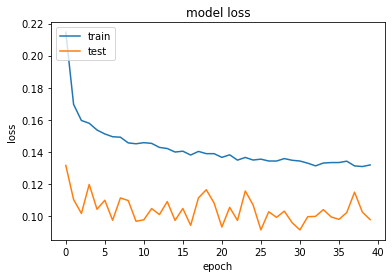

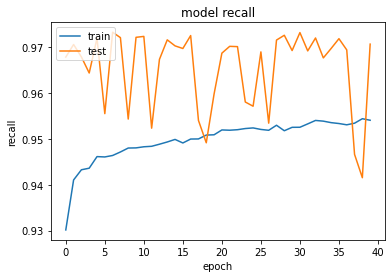

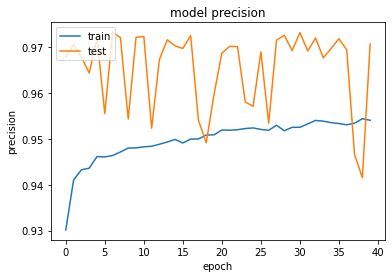

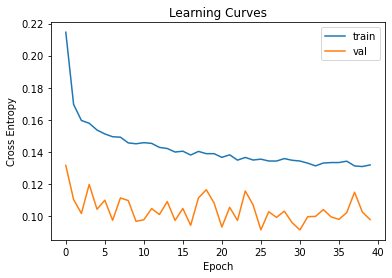

In [11]:
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)
# fig.save_model(net,dir_name)

In [12]:
fig.lr_graph(model_, dir_name)

KeyError: 'lr'